In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [5]:
X = np.array([[2, 5],
              [1.5, 6],
              [1.5, 5.5 ],
              [1, 4],
              [3, 4.5],
              [10,7],
              [9,8],
              [9.5,7.5],
              [9,8.5],
              [8, 7.5],
              [3, 10],
              [3.5, 9],
              [2.5, 10],
              [2, 10],
              [2.3, 9.5],
              [7, 1],
              [6.5, 1],
              [8, 2],
              [6, 3],
              [7.5, 3],])

colors = 10*["g","r","c","b","k"]


In [6]:
class MeanShift:
    #initialization
    def __init__(self, radius=2):
        self.radius = radius

    def fit(self, data):
        centroids = {}

        #setting an initial centroid
        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            #everytime we have the mean of all the datapoints in the radius,
            #it's the new centroid that we'll put here
            new_centroids = [] 
            for i in centroids:
                in_bandwidth = [] #all the featuresets within the radius are put in here
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            #to get the unique elements from the new centroid lists
            uniques = sorted(list(set(new_centroids)))

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        #resetting the centroids
        self.centroids = centroids
        
        def predict(self,data):
            pass



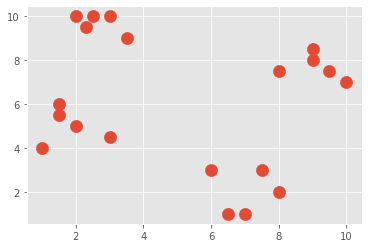

In [8]:
clf = MeanShift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()